<a href="https://colab.research.google.com/github/InesAgudoMartin/UNIWALLET/blob/main/UNIWALLET_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import warnings
import pandas as pd
import numpy as np
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import matplotlib.pyplot as plt

# URL directa al archivo CSV en GitHub
url = "https://raw.githubusercontent.com/InesAgudoMartin/UNIWALLET/main/expense_data_1.csv"
nombre = 'expense_data_1.csv'

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Leer el archivo CSV descargado
ds = pd.read_csv(nombre)

# Mostrar los primeros registros del DataFrame
print(ds.head())
ds.head(10)


Archivo descargado exitosamente.
             Date               Account        Category  Subcategory  \
0  3/2/2022 10:11  CUB - online payment            Food          NaN   
1  3/2/2022 10:11  CUB - online payment           Other          NaN   
2  3/1/2022 19:50  CUB - online payment            Food          NaN   
3  3/1/2022 18:56  CUB - online payment  Transportation          NaN   
4  3/1/2022 18:22  CUB - online payment            Food          NaN   

               Note    INR Income/Expense  Note.1  Amount Currency  Account.1  
0           Brownie   50.0        Expense     NaN    50.0      INR       50.0  
1  To lended people  300.0        Expense     NaN   300.0      INR      300.0  
2            Dinner   78.0        Expense     NaN    78.0      INR       78.0  
3             Metro   30.0        Expense     NaN    30.0      INR       30.0  
4            Snacks   67.0        Expense     NaN    67.0      INR       67.0  


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.00,Expense,NaN,50.00,INR,50.00
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.00,Expense,NaN,300.00,INR,300.00
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.00,Expense,NaN,78.00,INR,78.00
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.00,Expense,NaN,30.00,INR,30.00
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.00,Expense,NaN,67.00,INR,67.00
5,3/1/2022 18:22,CUB - online payment,Other,NaN,From vicky,100.00,Income,NaN,100.00,INR,100.00
6,3/1/2022 18:21,CUB - online payment,Other,NaN,From dad,500.00,Income,NaN,500.00,INR,500.00
7,2/28/2022 11:56,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15
8,2/28/2022 11:45,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00
9,2/27/2022 15:29,CUB - online payment,Food,NaN,Lunch,243.00,Expense,NaN,243.00,INR,243.00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


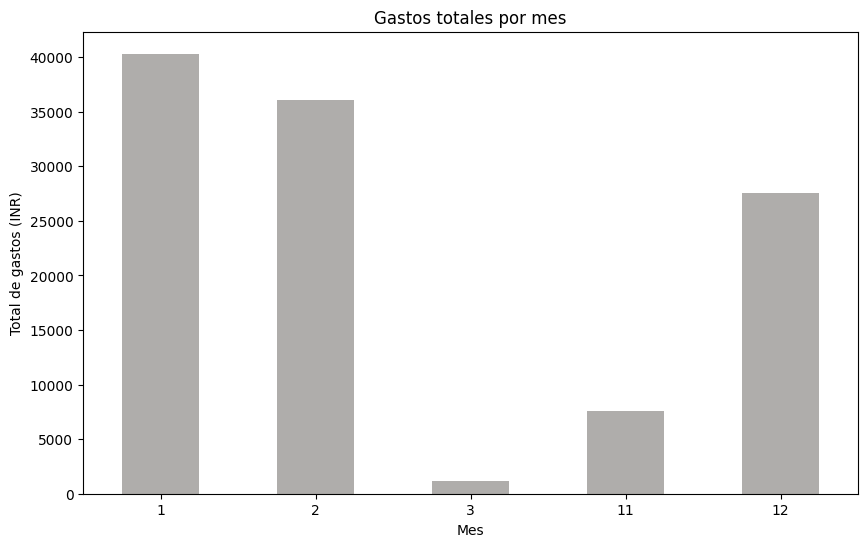

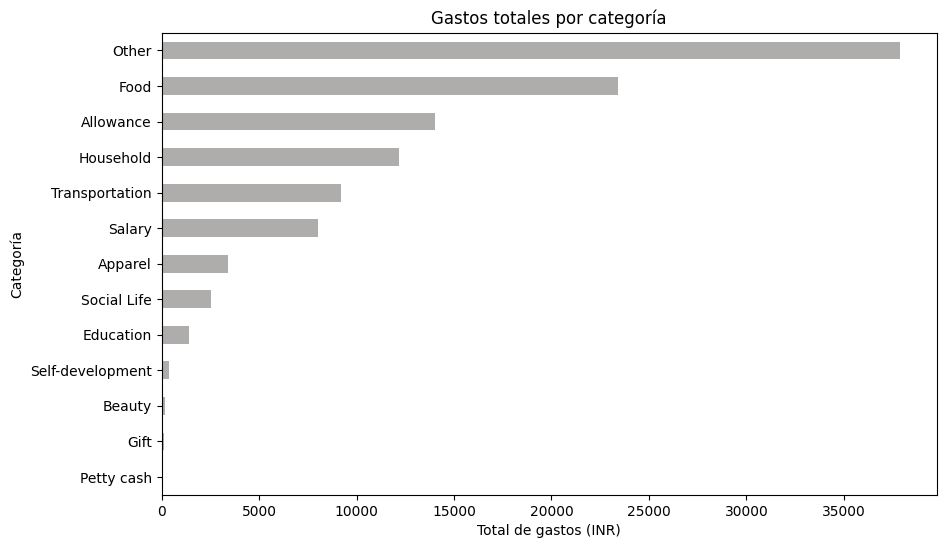

In [9]:
import matplotlib.pyplot as plt

# Convertir la columna 'Date' a formato datetime
ds['Date'] = pd.to_datetime(ds['Date'])

# Extraer el mes de la fecha
ds['Month'] = ds['Date'].dt.month

# Calcular el total de gastos por mes
total_gastos_mes = ds.groupby('Month')['Amount'].sum()

# Crear un gráfico de barras de gastos por mes
plt.figure(figsize=(10, 6))
total_gastos_mes.plot(kind='bar', color='#AFADAB')
plt.xlabel('Mes')
plt.ylabel('Total de gastos (INR)')
plt.title('Gastos totales por mes')
plt.xticks(rotation=0)
plt.show()


# Calcular el total de gastos por categoría
total_gastos_categoria = ds.groupby('Category')['Amount'].sum().sort_values()

# Crear un gráfico de barras horizontal de gastos por categoría
plt.figure(figsize=(10, 6))
total_gastos_categoria.plot(kind='barh', color='#AFADAB')
plt.xlabel('Total de gastos (INR)')
plt.ylabel('Categoría')
plt.title('Gastos totales por categoría')
plt.show()




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


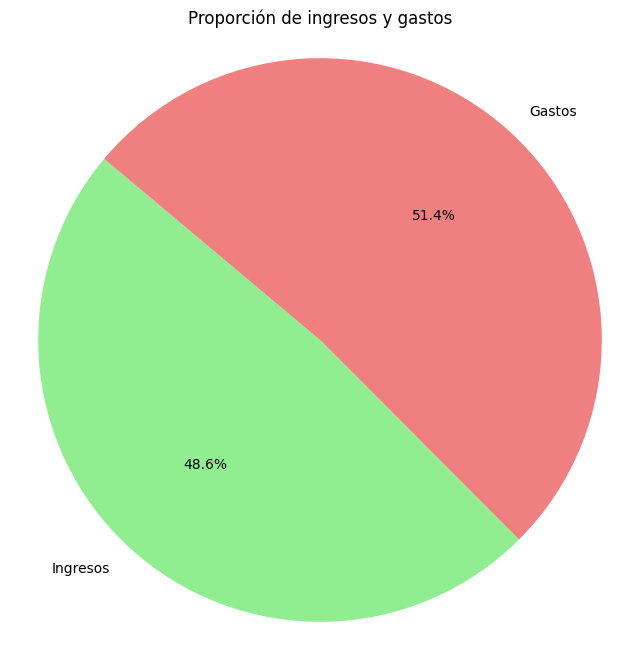

In [3]:
# Calcular la suma de ingresos y gastos
total_ingresos = ds[ds['Income/Expense'] == 'Income']['Amount'].sum()
total_gastos = ds[ds['Income/Expense'] == 'Expense']['Amount'].sum()

# Crear un gráfico de pastel de proporción de ingresos y gastos
plt.figure(figsize=(8, 8))
plt.pie([total_ingresos, total_gastos], labels=['Ingresos', 'Gastos'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporción de ingresos y gastos')
plt.axis('equal')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


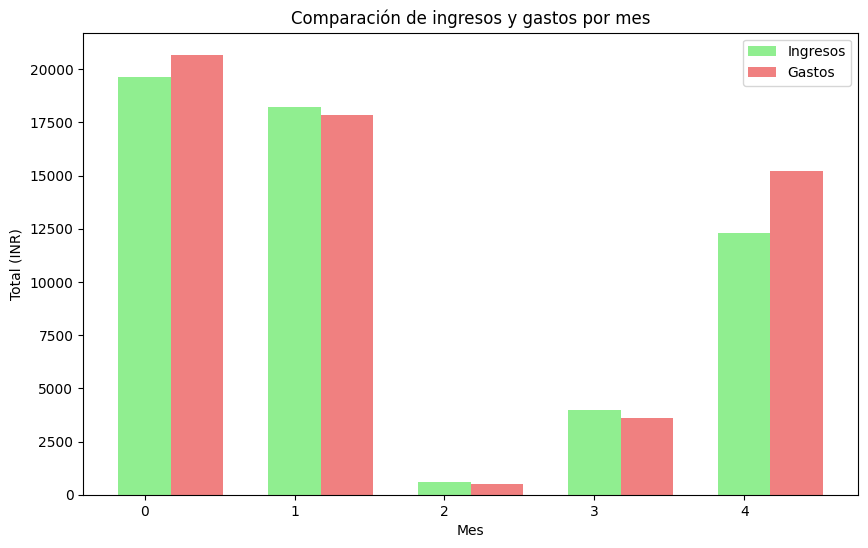

In [4]:
# Calcular el total de ingresos y gastos por mes
total_ingresos_mes = ds[ds['Income/Expense'] == 'Income'].groupby(ds['Date'].dt.month)['Amount'].sum()
total_gastos_mes = ds[ds['Income/Expense'] == 'Expense'].groupby(ds['Date'].dt.month)['Amount'].sum()

# Crear una figura y ejes
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Definir el ancho de las barras
bar_width = 0.35

# Calcular la posición de los grupos de barras
index = np.arange(len(total_ingresos_mes))

# Dibujar las barras de ingresos
ax.bar(index, total_ingresos_mes, bar_width, color='lightgreen', label='Ingresos')

# Dibujar las barras de gastos con un desplazamiento a la derecha
ax.bar(index + bar_width, total_gastos_mes, bar_width, color='lightcoral', label='Gastos')

# Etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Total (INR)')
ax.set_title('Comparación de ingresos y gastos por mes')


# Mostrar la leyenda
ax.legend()

plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


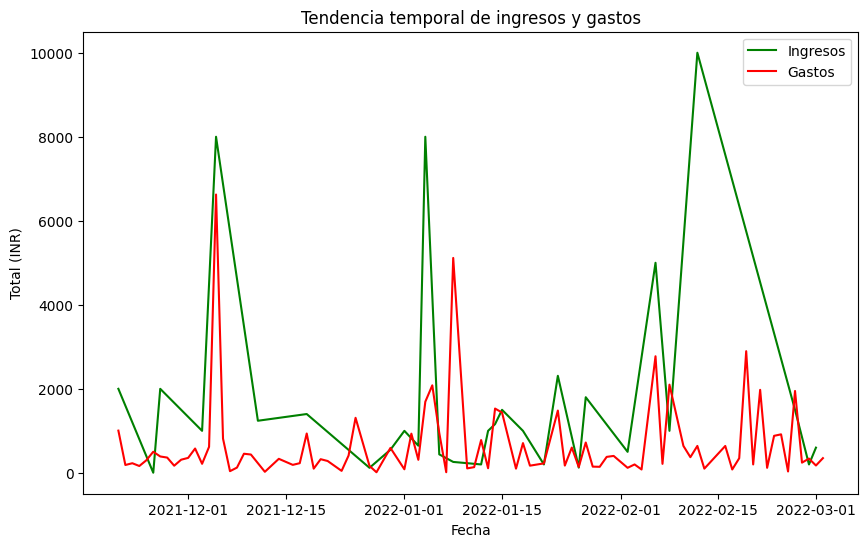

In [5]:
# Calcular el total de ingresos y gastos por fecha
total_ingresos_fecha = ds[ds['Income/Expense'] == 'Income'].groupby(ds['Date'].dt.date)['Amount'].sum()
total_gastos_fecha = ds[ds['Income/Expense'] == 'Expense'].groupby(ds['Date'].dt.date)['Amount'].sum()

# Crear un gráfico de líneas de tendencia temporal de ingresos y gastos
plt.figure(figsize=(10, 6))
plt.plot(total_ingresos_fecha.index, total_ingresos_fecha, label='Ingresos', color='green')
plt.plot(total_gastos_fecha.index, total_gastos_fecha, label='Gastos', color='red')
plt.xlabel('Fecha')
plt.ylabel('Total (INR)')
plt.title('Tendencia temporal de ingresos y gastos')
plt.legend()
plt.show()
